In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 115.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
  

In [2]:
# import all required dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn import metrics
from datetime import datetime
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Merged_df.csv to Merged_df.csv


In [14]:
merged_df = pd.read_csv("Merged_df.csv")

In [15]:
merged_df.head()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,company_name
0,2018-01-30,58.886002,59.396500,58.725498,58.868500,58.868500,37338000,Google
1,2018-01-31,59.190498,59.316002,58.605000,59.111000,59.111000,36022000,Google
2,2018-02-01,58.799500,59.372501,58.467999,59.079498,59.079498,73514000,Google
3,2018-02-02,56.370998,56.564999,55.558498,55.959999,55.959999,117842000,Google
4,2018-02-05,55.030499,55.749500,52.837002,53.119499,53.119499,83550000,Google


In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8806 entries, 0 to 8805
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8806 non-null   object 
 1   Open          8806 non-null   float64
 2   High          8806 non-null   float64
 3   Low           8806 non-null   float64
 4   Close         8806 non-null   float64
 5   Adj Close     8806 non-null   float64
 6   Volume        8806 non-null   int64  
 7   company_name  8806 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 550.5+ KB


In [17]:
# Change the column name
merged_df = merged_df.rename(columns = {"Unnamed: 0": "Date"})

In [18]:
merged_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,company_name
0,2018-01-30,58.886002,59.396500,58.725498,58.868500,58.868500,37338000,Google
1,2018-01-31,59.190498,59.316002,58.605000,59.111000,59.111000,36022000,Google
2,2018-02-01,58.799500,59.372501,58.467999,59.079498,59.079498,73514000,Google
3,2018-02-02,56.370998,56.564999,55.558498,55.959999,55.959999,117842000,Google
4,2018-02-05,55.030499,55.749500,52.837002,53.119499,53.119499,83550000,Google


In [19]:
merged_df.drop(columns=["Date", "company_name"], axis=1, inplace=True)

In [20]:
merged_df.head()

,Open,High,Low,Close,Adj Close,Volume
0,58.886002,59.396500,58.725498,58.868500,58.868500,37338000
1,59.190498,59.316002,58.605000,59.111000,59.111000,36022000
2,58.799500,59.372501,58.467999,59.079498,59.079498,73514000
3,56.370998,56.564999,55.558498,55.959999,55.959999,117842000
4,55.030499,55.749500,52.837002,53.119499,53.119499,83550000


In [21]:
ma_days = [10,20,50]
for ma in ma_days:
  column_name = f'MA for{ma} days'
  merged_df[column_name] = merged_df["Adj Close"].rolling(ma).mean()





In [22]:
merged_df

,Open,High,Low,Close,Adj Close,Volume,MA for10 days,MA for20 days,MA for50 days
0,58.886002,59.396500,58.725498,58.868500,58.868500,37338000,NaN,NaN,NaN
1,59.190498,59.316002,58.605000,59.111000,59.111000,36022000,NaN,NaN,NaN
2,58.799500,59.372501,58.467999,59.079498,59.079498,73514000,NaN,NaN,NaN
3,56.370998,56.564999,55.558498,55.959999,55.959999,117842000,NaN,NaN,NaN
4,55.030499,55.749500,52.837002,53.119499,53.119499,83550000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
8801,139.289993,143.759995,138.660004,143.270004,143.270004,27470100,135.621001,128.677001,120.364401
8802,141.690002,145.000000,141.360001,143.139999,143.139999,21970200,136.988000,129.978001,121.197801
8803,141.220001,143.169998,140.309998,141.500000,141.500000,26622000,137.839000,131.151001,121.790401
8804,144.399994,147.509995,143.300003,147.300003,147.300003,25482100,139.280000,132.672001,122.476001


In [23]:
#Create new dataframe with only the 'Close Columns'
data = merged_df.filter(['Adj Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
import math
training_data_len = math.ceil(len(dataset) * .7)

training_data_len

6165

In [24]:
merged_df.shape

(8806, 9)

In [25]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(dataset)

scaler_data

array([[0.06904975],
       [0.0694065 ],
       [0.06936015],
       ...,
       [0.1906098 ],
       [0.19914225],
       [0.20567398]])

In [27]:
# Create the training data set
# Create the scaled training dataset
train_data = scaler_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(400, len(train_data)):
  x_train.append(train_data[i-400:i, 0])
  y_train.append(train_data[i,0])


In [28]:
#Convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [29]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1) )
x_train.shape

(5765, 400, 1)

In [30]:
# Build the LSTM layer
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))


In [31]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [32]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

5765/5765 [==============================] - 515s 89ms/step - loss: 7.7265e-04


In [33]:
#Create the testing dataset
#Create a new array having scaled values from index 881 to 1258
test_data = scaler_data[training_data_len - 400: , :]

#Create the data set x_test and y_test
x_test =[]
y_test = dataset[training_data_len:, :]

for i in range(400, len(test_data)):
  x_test.append(test_data[i-400:i, 0])

In [34]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [35]:
#Reshape the data (need to convert it in 3 d shape for LSTM)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [36]:
# get the models predicted price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

83/83 [==============================] - 6s 55ms/step


In [37]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)


In [38]:
rmse

1.3930440669437107

In [39]:
#plot the data
train = data[: training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions


<ipython-input-39-94cde59c7dfb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


In [40]:
valid

,Adj Close,Predictions
6165,226.210007,225.754623
6166,221.419998,226.509369
6167,226.729996,223.882751
6168,229.910004,225.493881
6169,226.779999,229.091202
...,...,...
8801,143.270004,137.889206
8802,143.139999,141.862167
8803,141.500000,143.898163
8804,147.300003,143.430573


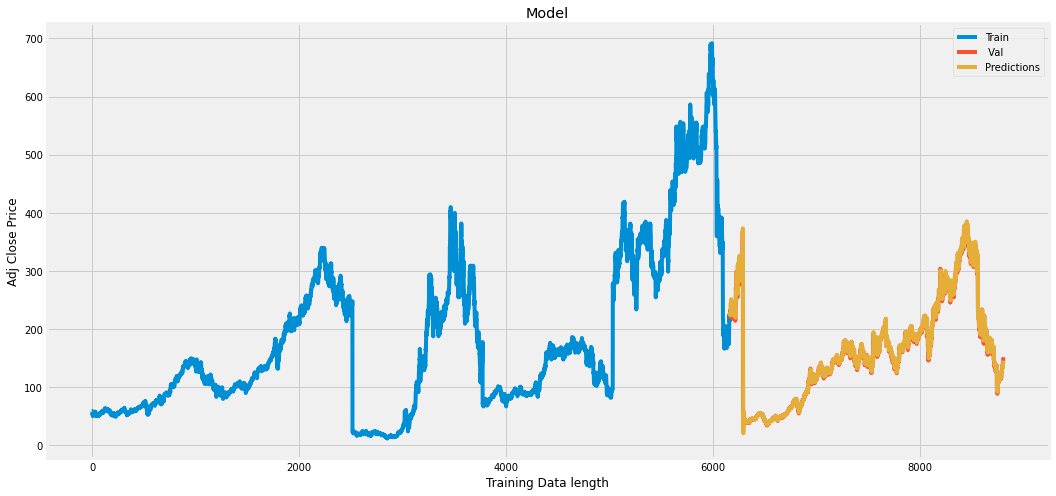

In [43]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Training Data length")
plt.ylabel('Adj Close Price')
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', ' Val', 'Predictions'])
plt.show()